## Import Libraries

In [17]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## Load the data

In [6]:
from google.colab import files
uploaded = files.upload()

Saving Dataset_plastics_mhadlekar_UN-20250720T094438Z-1-001.zip to Dataset_plastics_mhadlekar_UN-20250720T094438Z-1-001.zip


In [7]:
import zipfile
import os

zip_path = '/content/Dataset_plastics_mhadlekar_UN-20250720T094438Z-1-001.zip'
base_dir='/content/Dataset_plastics_mhadlekar_UN'            # destination

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(base_dir)

base_dir=os.path.join(base_dir,"Dataset_plastics_mhadlekar_UN")


## preprocess the data

In [8]:
# Image data generator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.25,  # 75% train, 25% val
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)


## Split the dataset

In [9]:
# Training data
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Validation data
validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 436 images belonging to 4 classes.
Found 143 images belonging to 4 classes.


## Build the model

In [13]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),

    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 classes: PET, HDPE, PP, PS
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# compile the model

In [14]:
from tensorflow.keras.metrics import Precision

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy', Precision()]
)

## **Train the Model**

In [15]:

steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = validation_generator.samples // validation_generator.batch_size

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_steps
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 68s 5s/step - accuracy: 0.3472 - loss: 1.9086 - precision: 0.3024 - val_accuracy: 0.2969 - val_loss: 1.3458 - val_precision: 0.0000e+00
Epoch 2/30
 1/13 ━━━━━━━━━━━━━━━━━━━━ 45s 4s/step - accuracy: 0.3750 - loss: 1.3277 - precision: 0.0000e+00

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 603ms/step - accuracy: 0.3750 - loss: 1.3277 - precision: 0.0000e+00 - val_accuracy: 0.3594 - val_loss: 1.3128 - val_precision: 0.0000e+00
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 65s 5s/step - accuracy: 0.4462 - loss: 1.2853 - precision: 0.3333 - val_accuracy: 0.3594 - val_loss: 1.4473 - val_precision: 0.0000e+00
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 616ms/step - accuracy: 0.5625 - loss: 1.1841 - precision: 0.5556 - val_accuracy: 0.3438 - val_loss: 1.5177 - val_precision: 0.0000e+00
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 71s 5s/step - accuracy: 0.5143 - loss: 1.2330 - precision: 0.5006 - val_accuracy: 0.3750 - val_loss: 1.5444 - val_precision: 0.1500
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 613ms/step - accuracy: 0.4375 - loss: 1.2226 - precision: 0.5714 - val_accuracy: 0.4141 - val_loss: 1.4526 - val_precision: 0.0588
Epoch 7/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 65s 5s/step - accuracy: 0.4981 - loss: 1.1490 - precision: 0.5830 - val_accuracy: 0.3594 - val_los

## Evaluate Performance

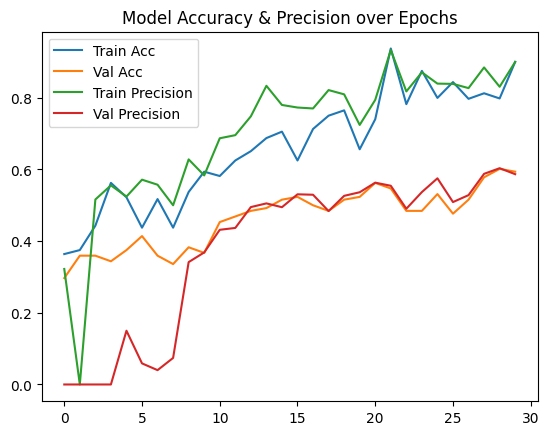

5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step


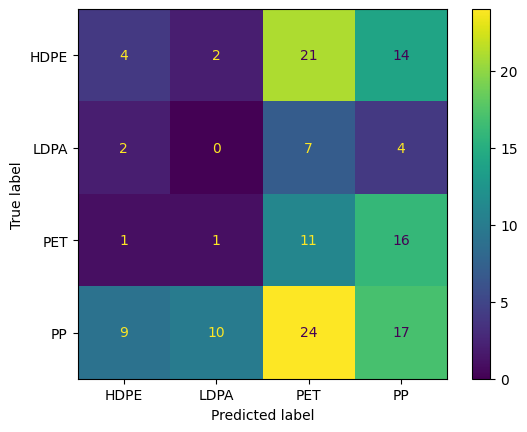

In [18]:
#  Plot Accuracy & Precision


plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.plot(history.history['precision'], label='Train Precision')
plt.plot(history.history['val_precision'], label='Val Precision')
plt.legend()
plt.title("Model Accuracy & Precision over Epochs")
plt.show()

# Confusion Matrix


# Get predictions
validation_generator.reset()
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = validation_generator.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
labels = list(validation_generator.class_indices.keys())
ConfusionMatrixDisplay(cm, display_labels=labels).plot()
